# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [33]:
!pip install pandas
import pandas as pd

In [34]:
df=pd.read_csv("./data/movies.csv")
print(df)

                                   MOVIES         YEAR  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           GENRE  RATING  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, Comedy                 9.2   
4  

**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [35]:
df.shape

(9999, 9)

In [36]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [37]:
data=df.copy(deep=True)
data.fillna({'Unknown':'NaN'}, inplace=True)
median=data.RATING.median()
data.fillna({'RATING':median},inplace=True)
data.fillna({'VOTES':0},inplace=True)

In [38]:
print(data)

                                   MOVIES         YEAR  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           GENRE  RATING  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, Comedy                 9.2   
4  

**1.4 Drop the duplicated rows**

In [39]:
data.drop_duplicates(inplace=True)

**1.5 Replace the columns names to make them all lowercase**

In [40]:
data.columns=data.columns.str.lower()

In [41]:
print(data)

                                   movies         year  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9993                            Totenfrau     (2022– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           genre  rating  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, Comedy                 9.2   
4  

**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [42]:
data['votes']=data['votes'].str.replace(',', '').astype(float)

In [43]:
print(data)

                                   movies         year  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9993                            Totenfrau     (2022– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           genre  rating  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, Comedy                 9.2   
4  

## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [44]:
data["rating"].mean()

np.float64(6.94608068561873)

**2.2 What is the maximum runtime?**

In [45]:
data["runtime"].max()

np.float64(853.0)

**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [48]:
max_runtime=data['runtime'].max()
data_filtered=data[data['runtime'] == max_runtime]
print(data_filtered)

                        movies         year  \
1902  El tiempo entre costuras  (2013–2014)   

                                        genre  rating  \
1902  \nAdventure, Drama, History                 8.3   

                                               one-line  \
1902  \nSira Quiroga is a young Spanish dressmaker e...   

                                                  stars   votes  runtime gross  
1902  \n            \n    Stars:\nAdriana Ugarte, \n...  3876.0    853.0   NaN  


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

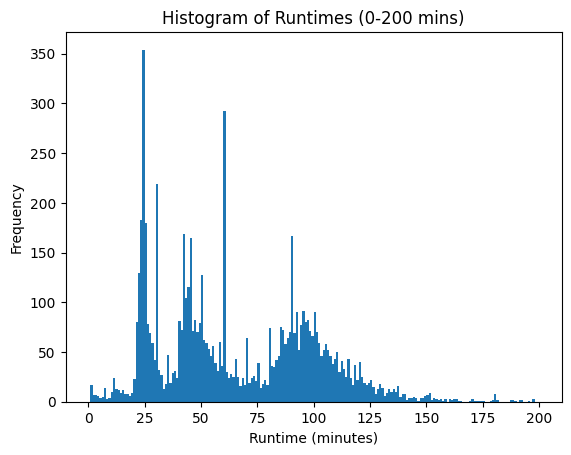

In [53]:
import matplotlib.pyplot as plt
filtered_data= data[(data['runtime']>=0) & (data['runtime']<=200)]
plt.hist(filtered_data['runtime'], bins=200, range=(0, 200))
plt.title('Histogram of Runtimes (0-200 mins)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [54]:
top_10_percent_votes=data['votes'].quantile(0.90)
print(f"to be in the top 10%, a movie needs at least {top_10_percent_votes} votes.")

to be in the top 10%, a movie needs at least 22193.100000000035 votes.


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [74]:
import pandas as pd
df_meta=pd.read_csv("./data/movies_metadata.csv", low_memory=False)
print(df.columns)
print(df_meta.columns)

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [78]:
merged_df=pd.merge(df, df_meta, how='inner', left_on='MOVIES', right_on='title')
print(merged_df.head())

             MOVIES         YEAR                                  GENRE  \
0  The Walking Dead  (2010–2022)  \nDrama, Horror, Thriller               
1  The Walking Dead  (2010–2022)  \nDrama, Horror, Thriller               
2           Lucifer  (2016–2021)    \nCrime, Drama, Fantasy               
3   The Good Doctor     (2017– )                    \nDrama               
4      Supernatural  (2005–2020)   \nDrama, Fantasy, Horror               

   RATING                                           ONE-LINE  \
0     8.2  \nSheriff Deputy Rick Grimes wakes up from a c...   
1     8.2  \nSheriff Deputy Rick Grimes wakes up from a c...   
2     8.1  \nLucifer Morningstar has decided he's had eno...   
3     8.1  \nShaun Murphy, a young surgeon with autism an...   
4     8.4  \nTwo brothers follow their father's footsteps...   

                                               STARS    VOTES  RunTime Gross  \
0  \n            \n    Stars:\nAndrew Lincoln, \n...  885,805     44.0   NaN   
1  \